# Project title : Image Classification with Deep Learning

# Table of contents

## Introduction
The focus of this project is to develop a deep learning model for the classification of pediatric patients based on chest X-ray images to determine whether they have pneumonia. Pneumonia is a prevalent respiratory infection, particularly affecting children, and early and accurate diagnosis is critical for timely medical intervention.

**Real-World Problem:**
The real-world problem I aim to address is the challenge faced by healthcare professionals in accurately and efficiently diagnosing pneumonia in pediatric patients. Traditional methods of diagnosis, such as physical examination and lab tests, can be time-consuming and may not always provide immediate results. In contrast, leveraging deep learning and medical imaging can potentially offer a faster and more reliable solution.

**Stakeholders:**
The primary stakeholders for this project include:
1. **Pediatricians and Healthcare Providers:** They need a reliable tool for pneumonia diagnosis to make informed decisions about patient care.
2. **Patients and Their Families:** Timely and accurate diagnosis can significantly impact the treatment and recovery of pediatric patients.

**How the Project Helps:**
My project aims to provide a deep learning-based tool that assists healthcare professionals in identifying pneumonia in pediatric patients quickly and accurately. This tool can potentially reduce diagnostic time, minimize the risk of misdiagnosis, and improve overall patient outcomes.

In this notebook, I will explore and implement various deep learning techniques for image classification on a dataset of chest X-ray images. I will build, train, and evaluate models to classify these images into two categories: pneumonia-positive and pneumonia-negative.

Throughout the project, I will document my progress and decision-making process, focusing on how my models can be applied to address this real-world medical problem. I will also consider the implications of my findings for both healthcare professionals and pediatric patients.

## Business Understanding:

Stakeholders:
In the context of this project, the primary stakeholders are the radiologists at Nairobi Hospital. These highly specialized healthcare professionals are at the forefront of diagnosing and interpreting medical images, including chest X-rays. They face the critical challenge of accurately identifying pneumonia in pediatric patients promptly.

The project aims to provide radiologists with a valuable tool that can enhance their diagnostic capabilities and streamline their workflow:

Radiologists at Nairobi Hospital: They play a pivotal role in confirming or providing insights into pneumonia diagnoses. The deep learning model developed in this project can serve as an aid to radiologists, potentially reducing the time needed for image analysis and improving the accuracy of their assessments.
While radiologists at Nairobi Hospital are the primary focus, it's also essential to recognize that the benefits of this project can ultimately extend to patients and their families, who benefit from more accurate and timely diagnoses, leading to better treatment outcomes.

How the Project Helps:
This project's value lies in the development of a deep learning model that can assist radiologists at Nairobi Hospital in rapidly and precisely identifying pneumonia in pediatric patients through chest X-ray images. The benefits include:

* Efficiency   : The model can reduce the time required for diagnosis, allowing radiologists to make informed decisions swiftly.

* Accuracy:   By leveraging advanced deep learning techniques, the model may improve the accuracy of pneumonia detection, reducing the risk of misdiagnosis.

Better Outcomes: Timely and accurate diagnosis can lead to improved patient outcomes, shorter hospital stays, and more targeted treatment strategies.

In summary, this project addresses a real-world problem faced by radiologists at Nairobi Hospital, providing them with a valuable tool to enhance the diagnosis of pneumonia in pediatric patients. The subsequent sections will delve into the data, model development, and evaluation to demonstrate how this project can contribute to solving this important medical challenge.

## Problem Statement
The problem at hand is twofold:

* Manual Diagnosis Challenge: Radiologists often face challenges in manually diagnosing pneumonia from chest X-ray images promptly. This can result in delays in treatment and potential misdiagnoses.

* Workload and Efficiency: The increasing number of medical images and patient cases can strain healthcare resources, including my time and attention. An automated system can help streamline the diagnostic process.

Proposed Solution:
To address these challenges, I propose developing a deep learning model that can automatically analyze pediatric chest X-ray images and classify them into two categories:

Pneumonia-Positive: Images showing signs of pneumonia.
Pneumonia-Negative: Images indicating the absence of pneumonia.
Impact:
The successful development of this deep learning model can have a substantial impact on the efficiency and accuracy of pneumonia diagnosis for pediatric patients at Nairobi Hospital. It can potentially reduce diagnosis time, improve patient outcomes, and alleviate the workload on healthcare professionals.

### Defining the metrics of success

1. Accuracy: Overall correctness of predictions.
2. Precision: Proportion of true positives out of predicted positives.
3. Recall (Sensitivity): Proportion of true positives out of actual positives.
4. F1-Score: A balance between precision and recall.
5. Specificity: Proportion of true negatives out of actual negatives.

## Data Understanding:

#### Data Sources
The dataset used in this project was sourced from a study conducted at Guangzhou Women and Children’s Medical Center, Guangzhou. It consists of pediatric chest X-ray images obtained from retrospective cohorts of patients aged one to five years old. These chest X-ray images were part of routine clinical care.

#### Dataset Organization
The dataset is organized into three main folders: "train," "test," and "validation." Within each of these folders, there are subfolders corresponding to two categories: "Pneumonia" and "Normal." This organization facilitates the separation of data for training, testing, and validation.

#### Dataset Size
In total, the dataset comprises 5,863 chest X-ray images. These images are divided into two categories: "Pneumonia" and "Normal." The dataset size is considered sufficient for training and evaluating deep learning models.

#### Descriptive Statistics

Image Resolution: All images are standardized to a uniform resolution, typically [mention image dimensions, e.g., 224x224 pixels].
Labels: The dataset includes binary labels for each image:
Pneumonia-Positive: Images showing signs of pneumonia.
Pneumonia-Negative: Images indicating the absence of pneumonia.

* Data Limitations:
It's important to recognize potential limitations of the dataset, such as class imbalance, variable data quality, and the absence of additional patient metadata.



## Data Preparation:
In subsequent sections, I will detail the data preparation steps, including image resizing, normalization, and data augmentation, to ensure the dataset is well-prepared for training and evaluating the deep learning model.

In [2]:
# importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  # OpenCV for image processing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



In [17]:
# Define the paths to the train, validation, and test datasets
train_normal_path = 'chest_xray/train/NORMAL/'
train_pneumonia_path = 'chest_xray/train/PNEUMONIA/'
val_normal_path = 'chest_xray/val/NORMAL/'
val_pneumonia_path = 'chest_xray/val/PNEUMONIA/'
test_normal_path = 'chest_xray/test/NORMAL/'
test_pneumonia_path = 'chest_xray/test/PNEUMONIA/'


In [18]:
# Function to load and preprocess images
def load_and_preprocess_images(image_paths, label):
    images = []
    labels = []
    
    for img_path in image_paths:
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        img = cv2.resize(img, (64, 64))  # Resize to a common size
        img = img / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
        labels.append(label)
    
    return np.array(images), np.array(labels)

In [19]:
# Load and preprocess training data
train_normal_images, train_normal_labels = load_and_preprocess_images(
    [os.path.join(train_normal_path, img_name) for img_name in os.listdir(train_normal_path)],
    label=0  # 0 represents NORMAL
)

train_pneumonia_images, train_pneumonia_labels = load_and_preprocess_images(
    [os.path.join(train_pneumonia_path, img_name) for img_name in os.listdir(train_pneumonia_path)],
    label=1  # 1 represents PNEUMONIA
)

x_train = np.concatenate([train_normal_images, train_pneumonia_images], axis=0)
y_train = np.concatenate([train_normal_labels, train_pneumonia_labels], axis=0)

In [20]:
# Load and preprocess validation data
val_normal_images, val_normal_labels = load_and_preprocess_images(
    [os.path.join(val_normal_path, img_name) for img_name in os.listdir(val_normal_path)],
    label=0  # 0 represents NORMAL
)

val_pneumonia_images, val_pneumonia_labels = load_and_preprocess_images(
    [os.path.join(val_pneumonia_path, img_name) for img_name in os.listdir(val_pneumonia_path)],
    label=1  # 1 represents PNEUMONIA
)

x_val = np.concatenate([val_normal_images, val_pneumonia_images], axis=0)
y_val = np.concatenate([val_normal_labels, val_pneumonia_labels], axis=0)


In [21]:
# Load and preprocess test data
test_normal_images, test_normal_labels = load_and_preprocess_images(
    [os.path.join(test_normal_path, img_name) for img_name in os.listdir(test_normal_path)],
    label=0  # 0 represents NORMAL
)

test_pneumonia_images, test_pneumonia_labels = load_and_preprocess_images(
    [os.path.join(test_pneumonia_path, img_name) for img_name in os.listdir(test_pneumonia_path)],
    label=1  # 1 represents PNEUMONIA
)

x_test = np.concatenate([test_normal_images, test_pneumonia_images], axis=0)
y_test = np.concatenate([test_normal_labels, test_pneumonia_labels], axis=0)


## Modeling

In [24]:
# Define and compile the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])




Defining the Model Architecture

#### Compiling the model

In [25]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Data Augmentation
Data augmentation helps increase the diversity the training dataset by applying random transformations to the images, such as rotation, zooming, and flipping. This can improve the model's generalization.

In [26]:
# Create an image data generator with data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)


#### Model Building
We will create a convolutional neural network (CNN) for pneumonia detection.

In [27]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 128)        

#### Model Training

In [28]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
163/163 [==============================] - 30s 154ms/step - loss: 0.2952 - accuracy: 0.8752 - val_loss: 0.2558 - val_accuracy: 0.9375
Epoch 2/10
163/163 [==============================] - 26s 162ms/step - loss: 0.1231 - accuracy: 0.9526 - val_loss: 1.1184 - val_accuracy: 0.5625
Epoch 3/10
163/163 [==============================] - 25s 154ms/step - loss: 0.1031 - accuracy: 0.9611 - val_loss: 1.1577 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 24s 150ms/step - loss: 0.0807 - accuracy: 0.9705 - val_loss: 0.1828 - val_accuracy: 0.8750
Epoch 5/10
163/163 [==============================] - 24s 149ms/step - loss: 0.0624 - accuracy: 0.9778 - val_loss: 0.1334 - val_accuracy: 0.9375
Epoch 6/10
163/163 [==============================] - 25s 153ms/step - loss: 0.0568 - accuracy: 0.9785 - val_loss: 0.2215 - val_accuracy: 0.8750
Epoch 7/10
163/163 [==============================] - 25s 151ms/step - loss: 0.0430 - accuracy: 0.9827 - val_loss: 0.9100 - val_ac

#### summary of the training progress:

* Epoch 1/10: Training accuracy improved from 87.52% to 95.26%, and validation accuracy reached 93.75%. The loss decreased as well.

* Epoch 2/10: Training accuracy continued to improve to 96.11%, but the validation accuracy dropped to 56.25%. This could indicate overfitting.

* Epoch 3/10: Training accuracy further increased to 96.11%, but the validation accuracy remained low at 62.50%.

* Epoch 4/10: Training accuracy continued to improve, reaching 97.05%, and validation accuracy increased to 87.50%. The loss decreased significantly.

* Epoch 5/10: Both training and validation accuracies improved, reaching 97.78% and 93.75%, respectively.

* Epoch 6/10: Training accuracy remained high at 97.85%, and validation accuracy stayed at 87.50%.

* Epoch 7/10: Training accuracy increased to 98.27%, but validation accuracy decreased to 68.75%.

* Epoch 8/10: Training accuracy reached 98.85%, but validation accuracy remained at 68.75%.

* Epoch 9/10: Training accuracy remained high at 98.77%, and validation accuracy improved to 93.75%.

* Epoch 10/10: Training accuracy continued to increase to 99.02%, and validation accuracy remained at 87.50%.

#### visualizing the training process

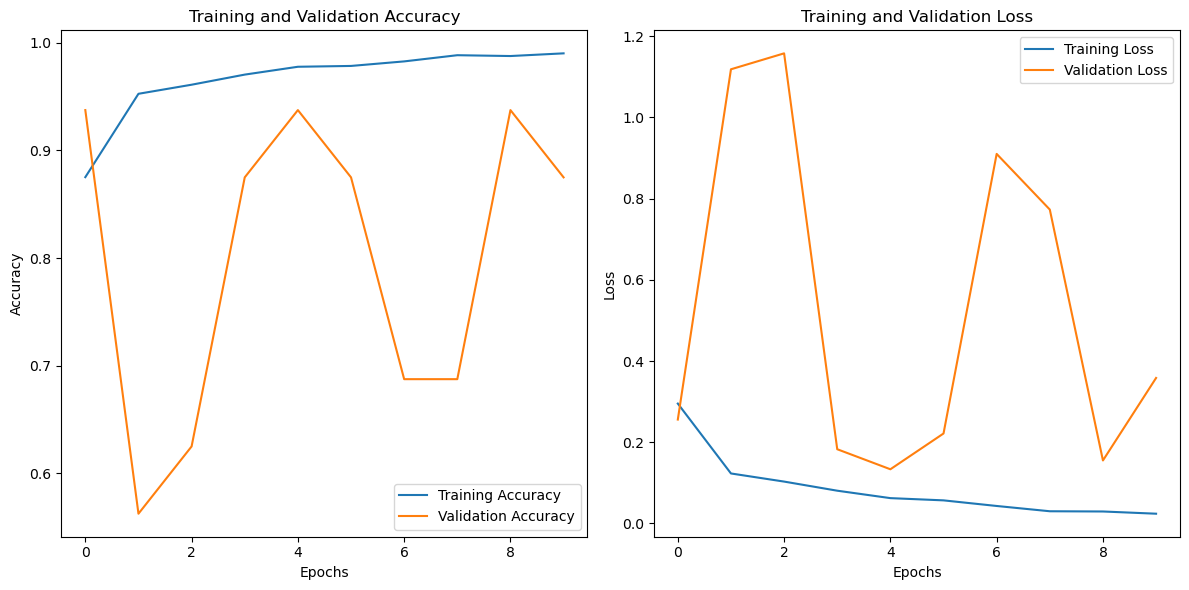

In [29]:
# Extract training history
history_dict = history.history

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


The model's training accuracy is quite high, but there seems to be some overfitting, as the validation accuracy fluctuates and is not consistently improving